In [3]:
#import libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
churn = pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### DATA Understanding and Imputing Missing values

#### Categorize data

In [6]:
#seperating category columns
cat_cols =  churn.select_dtypes(include=[np.object]).columns.tolist()
cat_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [7]:
#checking nulls in category columns
churn[cat_cols].isnull().sum()

last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
dtype: int64

Replacing missing values of date_of_last_rech columns with min date

In [9]:
# #replace missing values of date of last recharge with 1st of 6th month

churn.date_of_last_rech_6.fillna(value='6/1/2014',inplace=True)
churn.date_of_last_rech_7.fillna(value='6/1/2014',inplace=True)
churn.date_of_last_rech_8.fillna(value='6/1/2014',inplace=True)
churn.date_of_last_rech_9.fillna(value='6/1/2014',inplace=True)

In [10]:
#replace missing values of date of last recharge with 1st of 6th month

churn.date_of_last_rech_data_6.fillna(value='6/1/2014',inplace=True)
churn.date_of_last_rech_data_7.fillna(value='6/1/2014',inplace=True)
churn.date_of_last_rech_data_8.fillna(value='6/1/2014',inplace=True)
churn.date_of_last_rech_data_9.fillna(value='6/1/2014',inplace=True)


In [11]:
#replace missing values of last date of month with end date of month

churn.last_date_of_month_6.fillna(value='6/30/2014',inplace=True)
churn.last_date_of_month_7.fillna(value='7/31/2014',inplace=True)
churn.last_date_of_month_8.fillna(value='8/31/2014',inplace=True)
churn.last_date_of_month_9.fillna(value='9/30/2014',inplace=True)


In [12]:
#new feature for recharge: no. of days

churn["rech_days_6"] = (pd.to_datetime(churn.last_date_of_month_6) - pd.to_datetime(churn.date_of_last_rech_6)).dt.days
churn["rech_days_7"] = (pd.to_datetime(churn.last_date_of_month_7) - pd.to_datetime(churn.date_of_last_rech_7)).dt.days
churn["rech_days_8"] = (pd.to_datetime(churn.last_date_of_month_8) - pd.to_datetime(churn.date_of_last_rech_8)).dt.days
churn["rech_days_9"] = (pd.to_datetime(churn.last_date_of_month_9) - pd.to_datetime(churn.date_of_last_rech_9)).dt.days

In [13]:
#new feature for recharge_data : no. of days

churn["rech_data_days_6"] = (pd.to_datetime(churn.last_date_of_month_6) - pd.to_datetime(churn.date_of_last_rech_data_6)).dt.days
churn["rech_data_days_7"] = (pd.to_datetime(churn.last_date_of_month_7) - pd.to_datetime(churn.date_of_last_rech_data_7)).dt.days
churn["rech_data_days_8"] = (pd.to_datetime(churn.last_date_of_month_8) - pd.to_datetime(churn.date_of_last_rech_data_8)).dt.days
churn["rech_data_days_9"] = (pd.to_datetime(churn.last_date_of_month_9) - pd.to_datetime(churn.date_of_last_rech_data_9)).dt.days


In [14]:
print(churn["rech_days_6"].head())
print(churn["rech_data_days_6"].head())

0     9
1     1
2    13
3     2
4     4
Name: rech_days_6, dtype: int64
0     9
1    29
2    29
3    29
4    26
Name: rech_data_days_6, dtype: int64


In [15]:
#Drop all date columns, as we created no. of days for them

churn.drop(cat_cols,axis = 1 ,inplace = True)


In [16]:
#Drop Mobile number

churn.drop("mobile_number", axis = 1,inplace = True)

In [17]:
#recharge statistics

churn.filter(regex = 'rech').isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
total_rech_data_6     74846
total_rech_data_7     74428
total_rech_data_8     73660
total_rech_data_9     74077
max_rech_data_6       74846
max_rech_data_7       74428
max_rech_data_8       73660
max_rech_data_9       74077
count_rech_2g_6       74846
count_rech_2g_7       74428
count_rech_2g_8       73660
count_rech_2g_9       74077
count_rech_3g_6       74846
count_rech_3g_7       74428
count_rech_3g_8       73660
count_rech_3g_9       74077
av_rech_amt_data_6    74846
av_rech_amt_data_7    74428
av_rech_amt_data_8    73660
av_rech_amt_data_9    74077
rech_days_6               0
rech_days_7               0
rech_days_8               0
rech_days_9         

Here the recharge date and recharge data are having same amount of nulls, this means the customer didnt recharge
So replace nulls of recharge values with 0's

In [18]:
#Replace recharge data nulls with 0's

rech_list = churn.filter(regex = 'rech').columns

churn[rech_list] = churn[rech_list].fillna(0)


In [19]:
churn.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,jun_vbc_3g,sep_vbc_3g,rech_days_6,rech_days_7,rech_days_8,rech_days_9,rech_data_days_6,rech_data_days_7,rech_data_days_8,rech_data_days_9
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,...,60.021204,3.299373,6.263593,6.487305,8.648236,9.565586,24.459505,47.540415,70.050851,92.442704
std,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,...,253.938223,32.408353,6.747945,9.178788,17.052093,25.474138,8.925050,21.721550,35.329724,48.466593
min,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,29.000000,29.000000,27.000000,27.000000
50%,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,...,0.000000,0.000000,3.000000,4.000000,4.000000,2.000000,29.000000,60.000000,91.000000,121.000000
75%,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,...,0.000000,0.000000,10.000000,9.000000,7.000000,6.000000,29.000000,60.000000,91.000000,121.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,11166.210000,2618.570000,29.000000,60.000000,91.000000,121.000000,29.000000,60.000000,91.000000,121.000000


As there are more columns with only single value in it, will remove them

In [20]:
#List of Columns with only 1 value

col_list = churn.loc[:,churn.apply(pd.Series.nunique) == 1]
col_list.shape

(99999, 12)

In [21]:
#dropping columns with only 1 value

churn.drop(col_list,axis = 1,inplace= True)
churn.shape

(99999, 209)

#### Recharge data statistics

In [22]:
churn[churn.av_rech_amt_data_6 != 0].groupby("av_rech_amt_data_6").count().head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,jun_vbc_3g,sep_vbc_3g,rech_days_6,rech_days_7,rech_days_8,rech_days_9,rech_data_days_6,rech_data_days_7,rech_data_days_8,rech_data_days_9
av_rech_amt_data_6,,,,,,,,,,,,,,,,,,,,,
1.0,29,29,29,29,29,29,28,26,29,29,...,29,29,29,29,29,29,29,29,29,29
2.0,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5.0,19,19,19,19,18,19,19,18,18,19,...,19,19,19,19,19,19,19,19,19,19
6.0,4,4,4,4,4,4,3,3,4,4,...,4,4,4,4,4,4,4,4,4,4


In [23]:
churn[churn.total_rech_data_6 != 0].groupby("total_rech_data_6").count().head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,jun_vbc_3g,sep_vbc_3g,rech_days_6,rech_days_7,rech_days_8,rech_days_9,rech_data_days_6,rech_data_days_7,rech_data_days_8,rech_data_days_9
total_rech_data_6,,,,,,,,,,,,,,,,,,,,,
1.0,13309,13309,13309,13309,12896,12683,12398,12164,12896,12683,...,13309,13309,13309,13309,13309,13309,13309,13309,13309,13309
2.0,5186,5186,5186,5186,5075,4999,4866,4743,5075,4999,...,5186,5186,5186,5186,5186,5186,5186,5186,5186,5186
3.0,2065,2065,2065,2065,2031,2006,1947,1901,2031,2006,...,2065,2065,2065,2065,2065,2065,2065,2065,2065,2065
4.0,1335,1335,1335,1335,1328,1301,1273,1223,1328,1301,...,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335
5.0,808,808,808,808,798,785,758,744,798,785,...,808,808,808,808,808,808,808,808,808,808


In [24]:
churn[churn.max_rech_data_6 != 0].groupby("max_rech_data_6").count().head()


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,jun_vbc_3g,sep_vbc_3g,rech_days_6,rech_days_7,rech_days_8,rech_days_9,rech_data_days_6,rech_data_days_7,rech_data_days_8,rech_data_days_9
max_rech_data_6,,,,,,,,,,,,,,,,,,,,,
1.0,45,45,45,45,45,45,43,41,45,45,...,45,45,45,45,45,45,45,45,45,45
5.0,21,21,21,21,20,21,20,19,20,21,...,21,21,21,21,21,21,21,21,21,21
8.0,163,163,163,163,163,159,156,149,163,159,...,163,163,163,163,163,163,163,163,163,163
9.0,5,5,5,5,5,4,3,2,5,4,...,5,5,5,5,5,5,5,5,5,5
13.0,14,14,14,14,14,14,14,13,14,14,...,14,14,14,14,14,14,14,14,14,14


In [25]:
#columns with missing value > 30%

missing_percent = (churn.isnull().sum()/churn.shape[0])*100

columns = churn.columns

missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': missing_percent})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col

arpu_3g_6                  arpu_3g_6
arpu_3g_7                  arpu_3g_7
arpu_3g_8                  arpu_3g_8
arpu_2g_6                  arpu_2g_6
arpu_2g_7                  arpu_2g_7
arpu_2g_8                  arpu_2g_8
night_pck_user_6    night_pck_user_6
night_pck_user_7    night_pck_user_7
night_pck_user_8    night_pck_user_8
fb_user_6                  fb_user_6
fb_user_7                  fb_user_7
fb_user_8                  fb_user_8
Name: column_name, dtype: object

In [26]:
#removing columns with missing values > 30%

churn.drop(drop_col, axis=1, inplace=True)
churn.shape

(99999, 197)

In [27]:
churn.shape

(99999, 197)

### Data Preparation

#### selecting high value customers


In [28]:
#selecting high value customers

total_data_rech_6 =  (churn.total_rech_data_6 * churn.av_rech_amt_data_6)  

total_data_rech_7 = (churn.total_rech_data_7 * churn.av_rech_amt_data_7)

total_data_rech_7 = total_data_rech_7.fillna(0)
total_data_rech_6 = total_data_rech_6.fillna(0)

amt_rech = churn.total_rech_amt_6 + churn.total_rech_amt_7 + total_data_rech_6 + total_data_rech_7 


In [29]:
#percentile of 70

pc70 = np.percentile(amt_rech, 70.0)

In [30]:
high_val_cust = churn[amt_rech >= pc70]
high_val_cust.shape

(30001, 197)

#### Labelling Churn

In [31]:
#churned customers (churn=1, else 0) 
high_val_cust['churn'] = np.where(high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]
                                     .sum(axis=1) == 0, 
                                   1,
                                   0)

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
high_val_cust['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [33]:
drop_cols = [col for col in high_val_cust.columns if '_9' in col]
high_val_cust.drop(drop_cols, axis=1, inplace=True)

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
high_val_cust.shape

(30001, 147)

Text(0.5,1,'Churn Distribution')

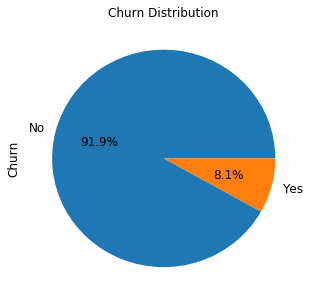

In [35]:
ax = (high_val_cust['churn'].value_counts()*100.0 /len(high_val_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 ) 

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

There are only 8.1 % churn case, which shows an highly imbalanced data
we have to go for other evaluation metrics to find accuracy like AUC of ROC,PRAUC

In [36]:
#rows with null values
len(high_val_cust[high_val_cust.isnull().sum(axis = 1) > 5])

1497

In [37]:
len(high_val_cust[high_val_cust.isnull().sum(axis = 1) > 10])

1497

There are 1497 rows with nulls compared to 30001, which is less

In [38]:
high_val_cust.isnull().sum().max()

1174

In [39]:
high_val_cust.shape

(30001, 147)

The max no. of Na's in any columns is 1174 which are very low compared to 30000 records they are only few NA's remained replacing them with 0's

In [40]:
high_val_cust.fillna(0,axis = 1,inplace = True)

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


### EDA

In [41]:
#Conevrt AON in Months
high_val_cust['aon_mon'] = high_val_cust['aon']/30
high_val_cust.drop('aon', axis=1, inplace=True)
high_val_cust['aon_mon'].head()

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5,1,'Customers by their tenure')

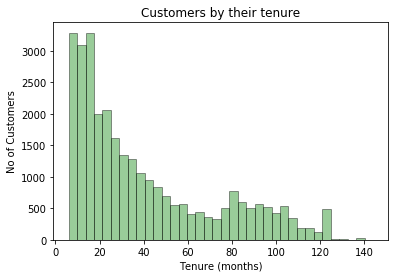

In [42]:
ax = sns.distplot(high_val_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

In [43]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
high_val_cust['tenure_range'] = pd.cut(high_val_cust['aon_mon'], tn_range, labels=tn_label)
high_val_cust['tenure_range'].head()

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

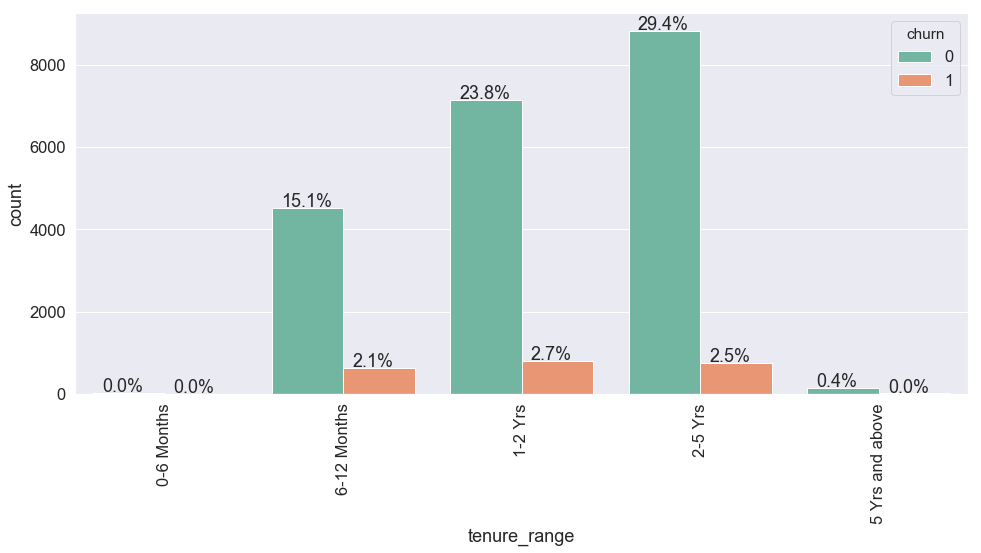

In [44]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(high_val_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(high_val_cust.index))
ax = sns.countplot(x="tenure_range", data=high_val_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(high_val_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

High tenure rate customers are less likely to churn which indicates a good customer service

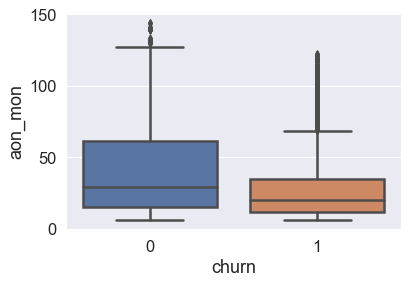

In [74]:
sns.boxplot(x = high_val_cust.churn, y = high_val_cust.aon_mon)

The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

In [76]:
high_val_cust.drop('tenure_range', axis=1, inplace=True)

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
#avarage of column "_6,_7"

cols = high_val_cust.columns

new_list = high_val_cust.filter(regex = '_6|_7').columns.str[:-2].unique()

for idx, col in enumerate(new_list.unique()):
    print(col)
    avg_col_name = col+"_avg67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    high_val_cust[avg_col_name] = (high_val_cust[col_6]  + high_val_cust[col_7])/ 2
    

arpu
onnet_mou
offnet_mou
roam_ic_mou


C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
loc_ic_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
rech_days
rech_data_days


In [46]:
avg_list = high_val_cust.filter(regex = '_avg67').columns.str[:-6].unique()

In [47]:
#difference of 8th and average of 6th ,7th column

for idx,col in enumerate(avg_list.unique()):
    print(col)
    diff_col_name = "avg67_diff8_"+col
    col_67 =  col+"_avg67"
    col_8 = col+"_8"
    high_val_cust[diff_col_name] = high_val_cust[col_67] - high_val_cust[col_8]


arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
total_og_mou
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
loc_ic_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
std_ic_mou
total_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
rech_days
rech_data_days


In [48]:
print(high_val_cust.shape)
col_list = high_val_cust.filter(regex = '_6|_7')
high_val_cust.drop(col_list,axis = 1,inplace = True)
print(high_val_cust.shape)

(30001, 242)
(30001, 148)


C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [49]:
print(high_val_cust.shape)
col_list = high_val_cust.filter(regex = '_8')
high_val_cust.drop(col_list,axis = 1,inplace = True)
print(high_val_cust.shape)

(30001, 148)
(30001, 101)


C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [50]:
high_val_cust.shape

(30001, 101)

In [51]:
#correlations

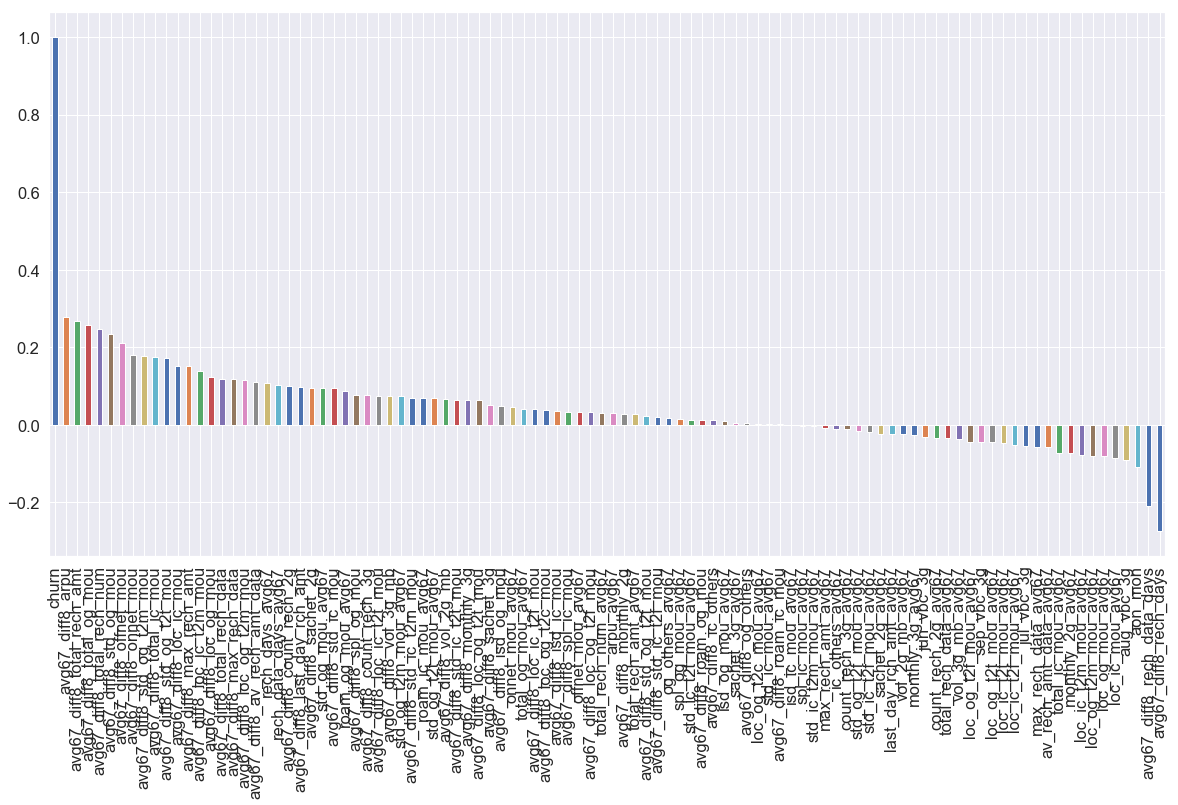

In [52]:
#correlations in the data

#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
high_val_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [77]:
#Test Train Split

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = high_val_cust.drop(['churn'], axis=1)

X.head()

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,aon_mon,arpu_avg67,onnet_mou_avg67,offnet_mou_avg67,roam_ic_mou_avg67,roam_og_mou_avg67,...,avg67_diff8_count_rech_3g,avg67_diff8_av_rech_amt_data,avg67_diff8_vol_2g_mb,avg67_diff8_vol_3g_mb,avg67_diff8_monthly_2g,avg67_diff8_sachet_2g,avg67_diff8_monthly_3g,avg67_diff8_sachet_3g,avg67_diff8_rech_days,avg67_diff8_rech_data_days
0,30.40,0.00,101.20,3.58,32.266667,206.1005,0.00,0.000,0.00,0.000,...,0.0,0.0,9.975,7.555,0.0,0.0,0.0,0.0,-11.0,-11.0
7,57.74,19.38,18.74,0.00,26.733333,1209.5150,56.26,510.295,24.86,18.165,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,-0.5,-46.5
8,21.03,910.65,122.16,0.00,10.500000,435.4720,382.36,87.645,0.00,0.000,...,0.0,19.5,177.970,363.535,0.5,-2.5,0.0,0.0,1.5,6.5
21,0.00,0.00,0.00,0.00,24.000000,556.1030,117.26,827.305,0.00,0.000,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,-46.5
23,40.45,51.86,0.00,0.00,20.133333,134.1235,49.81,87.385,0.00,0.000,...,-1.0,-92.0,0.230,-710.375,0.0,0.0,0.0,-1.0,11.0,1.5


In [78]:
#percentiles
high_val_cust.describe(percentiles=[0.01,0.1,.25,.5,.75,.90,.99])

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,aon_mon,arpu_avg67,onnet_mou_avg67,offnet_mou_avg67,roam_ic_mou_avg67,...,avg67_diff8_count_rech_3g,avg67_diff8_av_rech_amt_data,avg67_diff8_vol_2g_mb,avg67_diff8_vol_3g_mb,avg67_diff8_monthly_2g,avg67_diff8_sachet_2g,avg67_diff8_monthly_3g,avg67_diff8_sachet_3g,avg67_diff8_rech_days,avg67_diff8_rech_data_days
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,169.138860,178.872765,158.523962,8.029788,0.081364,40.312292,559.636514,264.306159,375.898565,14.376429,...,0.028416,13.085795,19.896683,5.733637,0.025249,0.085180,0.012366,0.016049,-2.240309,-23.374838
std,420.974354,443.544138,416.734860,52.378232,0.273398,31.922600,429.909145,439.579176,457.633472,66.078507,...,0.992313,148.249896,256.114926,624.877555,0.353771,1.867673,0.474128,0.871149,12.319597,32.301608
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,-749.783000,0.000000,0.000000,0.000000,...,-42.500000,-1805.000000,-8062.295000,-15646.390000,-3.500000,-26.500000,-7.000000,-36.000000,-91.000000,-91.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,6.266667,83.726000,0.000000,0.000000,0.000000,...,-2.500000,-448.500000,-777.405000,-1987.610000,-1.000000,-6.000000,-1.500000,-2.000000,-82.500000,-87.500000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,9.466667,213.807000,2.400000,18.420000,0.000000,...,-0.500000,-116.000000,-68.235000,-310.945000,0.000000,-1.000000,0.000000,0.000000,-7.500000,-66.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,15.333333,345.289000,20.620000,83.145000,0.000000,...,0.000000,-9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-46.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,28.200000,484.859500,92.035000,235.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
75%,128.800000,137.290000,98.440000,0.000000,0.000000,58.533333,674.571000,307.500000,497.990000,1.525000,...,0.000000,59.000000,21.120000,2.270000,0.000000,0.000000,0.000000,0.000000,1.500000,2.000000
90%,580.680000,611.310000,532.610000,0.900000,0.000000,93.100000,949.558000,766.345000,887.890000,28.035000,...,0.500000,152.000000,168.225000,383.960000,0.500000,1.500000,0.500000,0.500000,4.500000,14.500000


There are some outliers, which are safe to remove

In [79]:
##outlier treatment

for col in X.columns:
    percentiles = X[col].quantile([0.01,0.99]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

In [80]:
# Putting response variable to y
y = high_val_cust['churn']

y.sum()


2441

#### Splitting data

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [82]:
X_train.isnull().sum()

aug_vbc_3g                      0
jul_vbc_3g                      0
jun_vbc_3g                      0
sep_vbc_3g                      0
aon_mon                         0
arpu_avg67                      0
onnet_mou_avg67                 0
offnet_mou_avg67                0
roam_ic_mou_avg67               0
roam_og_mou_avg67               0
loc_og_t2t_mou_avg67            0
loc_og_t2m_mou_avg67            0
loc_og_t2f_mou_avg67            0
loc_og_t2c_mou_avg67            0
loc_og_mou_avg67                0
std_og_t2t_mou_avg67            0
std_og_t2m_mou_avg67            0
std_og_t2f_mou_avg67            0
std_og_mou_avg67                0
isd_og_mou_avg67                0
spl_og_mou_avg67                0
og_others_avg67                 0
total_og_mou_avg67              0
loc_ic_t2t_mou_avg67            0
loc_ic_t2m_mou_avg67            0
loc_ic_t2f_mou_avg67            0
loc_ic_mou_avg67                0
std_ic_t2t_mou_avg67            0
std_ic_t2m_mou_avg67            0
std_ic_t2f_mou

### Feature Scaling

In [83]:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [84]:
#Feature standardization

from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pan

### Modelling

In [86]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20900
Model Family:                Binomial   Df Model:                           99
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3622.2
Date:                Mon, 19 Aug 2019   Deviance:                       7244.4
Time:                        18:31:32   Pearson chi2:                 1.43e+05
No. Iterations:                    10   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.3136      0.085    -50.504      0.000      -4.481      -4.146
aug_vbc_3g                      -0.2277      0.083     -2.738      0.006      -0.391      -0.065
jul_vbc_3g                       0.0385      0.062      0.617      0.537      -0.084       0.161
jun_vbc_3g                       0.0212      0.053      0.400      0.689      -0.083       0.125
sep_vbc_3g                      -0.9159      0.216     -4.235      0.000      -1.340      -0.492
aon_mon                         -0.2824      0.041     -6.871      0.000      -0.363      -0.202
arpu_avg67                       0.3778      0.185      2.041      0.041       0.015       0.741
onnet_mou_avg67                 -0.0062      0.214     -0.029      0.977      -0.425       0.413
offnet_mou_avg67                 0.0570      0.237      0.241      0.810      -0.407       0.521
roam_ic_mou_avg67               -0.0157      0.047     -0.335      0.738      -0.108       0.076
roam_og_mou_avg67                0.1857      0.058      3.177      0.001       0.071       0.300
loc_og_t2t_mou_avg67            -0.7028      0.216     -3.258      0.001      -1.126      -0.280
loc_og_t2m_mou_avg67            -1.1775      0.260     -4.532      0.000      -1.687      -0.668
loc_og_t2f_mou_avg67            -0.1263      0.071     -1.770      0.077      -0.266       0.014
loc_og_t2c_mou_avg67            -0.0052      0.050     -0.104      0.917      -0.102       0.092
loc_og_mou_avg67                 1.4868      0.464      3.206      0.001       0.578       2.396
std_og_t2t_mou_avg67            -0.3666      0.227     -1.613      0.107      -0.812       0.079
std_og_t2m_mou_avg67            -0.3727      0.240     -1.556      0.120      -0.842       0.097
std_og_t2f_mou_avg67            -0.1318      0.072     -1.818      0.069      -0.274       0.010
std_og_mou_avg67                 1.4289      0.481      2.971      0.003       0.486       2.371
isd_og_mou_avg67                 0.0252      0.041      0.615      0.539      -0.055       0.106
spl_og_mou_avg67                 0.0419      0.054      0.777      0.437      -0.064       0.148
og_others_avg67                 -0.2582      0.480     -0.538      0.590      -1.198       0.682
total_og_mou_avg67              -1.3828      0.431     -3.207      0.001      -2.228      -0.538
loc_ic_t2t_mou_avg67            -0.2727      0.157     -1.731      0.083      -0.581       0.036
loc_ic_t2m_mou_avg67            -0.5863      0.238     -2.469      0.014      -1.052      -0.121
loc_ic_t2f_mou_avg67            -0.2034      0.094     -2.171      0.030      -0.387      -0.020
loc_ic_mou_avg67                -0.0985      0.375     -0.263      0.793      -0.834       0.637
std_ic_t2t_mou_avg67            -0.0919      0.090     -1.018      0.308      -0.269       0.085
std_ic_t2m_mou_avg67            -0.1546      0.122     -1.

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False  True False  True False False False False  True  True
 False False  True False False False  True False False False  True False
  True False  True False False False False False  True False False  True
 False False  True False False False False False False False  True False
 False False False  True False False False False False False False False
 False False False False False  True False False False  True  True  True
 False False False False False False False  True False False  True False
 False  True False False  True False False  True False False  True False
 False False  True]
[ 6 54 64  1  5  1 72 66 70 11  1  1 31 75  1 23 24 28  1 68 62 42  1  8
  1 12  1 33 26 56  4  9  1 61 60  1 69 32  1 20 48 19 15 17  2 67  1 35
 16 14  7  1 43 39 21 52 40 30 38 65 44 37 22 53 27  1 73 45 51  1  1  1
 13 41 58 34 55  3 71  1 46 59  1 25 57  1 74 49  1 29 47  1 18 36  1 50
 63 10  1]


In [88]:
col = X_train.columns[rfe.support_]

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3823.5
Date:                Mon, 19 Aug 2019   Deviance:                       7646.9
Time:                        18:33:44   Pearson chi2:                 1.78e+05
No. Iterations:                    10   Covariance Type:             nonrobust
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.2503      0.081    -52.283      0.000      -4.410      -4.091
sep_vbc_3g                      -0.9620      0.216     -4.449      0.000      -1.386      -0.538
arpu_avg67                       0.4928      0.046     10.764      0.000       0.403       0.583
loc_og_t2t_mou_avg67            -0.4919      0.156     -3.163      0.002      -0.797      -0.187
loc_og_t2m_mou_avg67            -0.8684      0.196     -4.419      0.000      -1.254      -0.483
loc_og_mou_avg67                 0.8213      0.383      2.144      0.032       0.070       1.572
std_og_mou_avg67                 0.6998      0.340      2.060      0.039       0.034       1.366
total_og_mou_avg67              -1.2742      0.378     -3.369      0.001      -2.016      -0.533
loc_ic_t2m_mou_avg67            -0.3911      0.153     -2.548      0.011      -0.692      -0.090
loc_ic_mou_avg67                -0.6799      0.151     -4.507      0.000      -0.976      -0.384
spl_ic_mou_avg67                -0.4453      0.075     -5.910      0.000      -0.593      -0.298
total_rech_num_avg67            -0.4536      0.052     -8.720      0.000      -0.556      -0.352
last_day_rch_amt_avg67          -0.4559      0.055     -8.339      0.000      -0.563      -0.349
monthly_2g_avg67                -0.4203      0.070     -6.029      0.000      -0.557      -0.284
rech_data_days_avg67             0.3365      0.040      8.459      0.000       0.259       0.414
avg67_diff8_std_og_mou          -0.5648      0.139     -4.077      0.000      -0.836      -0.293
avg67_diff8_total_og_mou         1.1267      0.162      6.936      0.000       0.808       1.445
avg67_diff8_loc_ic_t2t_mou       0.3229      0.057      5.679      0.000       0.211       0.434
avg67_diff8_loc_ic_t2m_mou       0.9177      0.074     12.321      0.000       0.772       1.064
avg67_diff8_spl_ic_mou           0.6542      0.097      6.749      0.000       0.464       0.844
avg67_diff8_total_rech_num       0.4241      0.050      8.490      0.000       0.326       0.522
avg67_diff8_last_day_rch_amt     0.5353      0.050     10.603      0.000       0.436       0.634
avg67_diff8_count_rech_2g        0.9394      0.302      3.113      0.002       0.348       1.531
avg67_diff8_vol_2g_mb            0.2134      0.036      5.994      0.000       0.144       0.283
avg67_diff8_sachet_2g           -0.8129      0.296     -2.749      0.006      -1.392      -0.233
avg67_diff8_rech_data_days      -0.3953      0.039    -10.179      0.000      -0.471      -0.319
================================================================================================
"""

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_og_mou_avg67,75.04
6,total_og_mou_avg67,61.73
5,std_og_mou_avg67,49.57
21,avg67_diff8_count_rech_2g,28.66
23,avg67_diff8_sachet_2g,27.17
3,loc_og_t2m_mou_avg67,21.54
2,loc_og_t2t_mou_avg67,13.10
15,avg67_diff8_total_og_mou,6.73
7,loc_ic_t2m_mou_avg67,6.03
14,avg67_diff8_std_og_mou,5.80


Not very high VIF's, lets keep all of them

In [91]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [92]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.196565,39186
1,0,0.003750,39833
2,0,0.037319,38778
3,0,0.001525,43026
4,0,0.008405,12271


In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [94]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19063   246]
 [ 1189   502]]


##### Plotting the ROC Curve

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

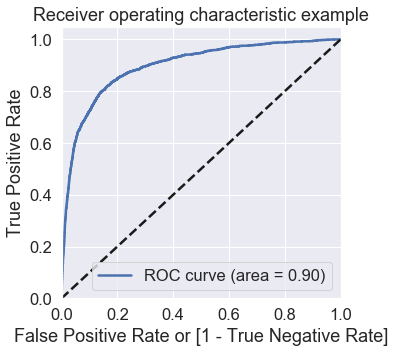

In [97]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [98]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob))

'0.90'

In [99]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196565,39186,0,1,1,0,0,0,0,0,0,0,0
1,0,0.003750,39833,0,1,0,0,0,0,0,0,0,0,0
2,0,0.037319,38778,0,1,0,0,0,0,0,0,0,0,0
3,0,0.001525,43026,0,1,0,0,0,0,0,0,0,0,0
4,0,0.008405,12271,0,1,0,0,0,0,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.840905  0.808989  0.843700
0.2   0.2  0.904524  0.678297  0.924336
0.3   0.3  0.925810  0.578947  0.956186
0.4   0.4  0.930952  0.441159  0.973846
0.5   0.5  0.931667  0.296866  0.987260
0.6   0.6  0.927095  0.157895  0.994459
0.7   0.7  0.923667  0.075695  0.997928
0.8   0.8  0.921048  0.028386  0.999223
0.9   0.9  0.919619  0.002957  0.999896


 Making predictions on the test set

In [102]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\pandas\core\frame.py:3116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [103]:
X_test_1 = X_test[col]
X_test_1.head()

,sep_vbc_3g,arpu_avg67,loc_og_t2t_mou_avg67,loc_og_t2m_mou_avg67,loc_og_mou_avg67,std_og_mou_avg67,total_og_mou_avg67,loc_ic_t2m_mou_avg67,loc_ic_mou_avg67,spl_ic_mou_avg67,...,avg67_diff8_total_og_mou,avg67_diff8_loc_ic_t2t_mou,avg67_diff8_loc_ic_t2m_mou,avg67_diff8_spl_ic_mou,avg67_diff8_total_rech_num,avg67_diff8_last_day_rch_amt,avg67_diff8_count_rech_2g,avg67_diff8_vol_2g_mb,avg67_diff8_sachet_2g,avg67_diff8_rech_data_days
20296,-0.218528,-0.040555,-0.501956,-0.657077,-0.696688,-0.621275,-0.937061,-0.600105,-0.638943,-0.449742,...,-0.129402,0.003017,0.160669,-0.116509,0.979809,-0.580394,-0.069592,-0.105691,-0.054578,-0.722024
8279,-0.218528,-1.264926,-0.494770,-0.764948,-0.771978,-0.637355,-0.967234,-0.802040,-0.714282,-0.449742,...,-0.112087,0.486077,-0.011107,-0.116509,0.376875,0.057269,2.103774,0.198328,2.144080,0.147881
72269,-0.218528,0.520917,1.081313,2.755570,2.282273,-0.404076,0.821546,1.173069,0.795284,-0.449742,...,-0.167310,0.743339,-0.177079,-0.116509,0.032341,0.084794,-0.069592,-0.100449,-0.054578,-1.483191
65602,-0.218528,-0.244417,-0.152869,0.209819,0.037157,-0.425501,-0.378427,0.365954,0.204241,-0.449742,...,-0.058280,0.650496,0.513005,-0.116509,-0.828993,-0.176694,-0.069592,-0.105691,-0.054578,-0.722024
42758,-0.218528,-0.148068,-0.473551,-0.254134,-0.427795,0.357192,0.090007,0.604184,0.203019,2.730788,...,1.361867,-0.006597,2.336330,2.249772,2.013410,-0.084944,1.172332,0.588732,0.573610,-1.778337


In [104]:
X_test_sm = sm.add_constant(X_test_1)

In [105]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

20296    0.230839
8279     0.117526
72269    0.001919
65602    0.034764
42758    0.552230
80210    0.005294
67925    0.017237
25034    0.017846
10422    0.014498
43140    0.022197
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
20296,0.230839
8279,0.117526
72269,0.001919
65602,0.034764
42758,0.552230


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [108]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [110]:
y_pred_final.head()

,churn,CustID,0
0,1,20296,0.230839
1,1,8279,0.117526
2,0,72269,0.001919
3,0,65602,0.034764
4,1,42758,0.552230


In [111]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  after removing the cwd from sys.path.


In [112]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churn,Churn_Prob
0,20296,1,0.230839
1,8279,1,0.117526
2,72269,0,0.001919
3,65602,0,0.034764
4,42758,1,0.552230


In [113]:
#with optimal cut-off
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.15 else 0)

In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8896789245639374

In [115]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7435,  816],
       [ 177,  573]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false

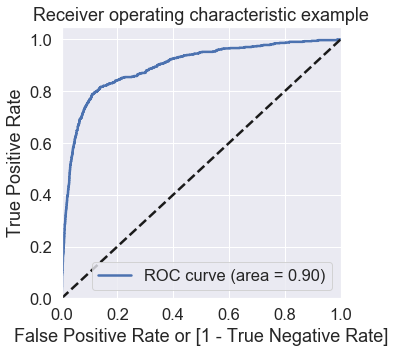

In [117]:
draw_roc(y_pred_final.churn, y_pred_final.Churn_Prob)

In [118]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churn, y_pred_final.Churn_Prob))

'0.90'

We see an overall AUC score of 0.89 looks like we did a decent job.
Try PCA for feature selection

### PCA on the data

In [119]:
print(X_train.shape)
print(X_test.shape)

(21000, 99)
(9001, 99)


In [120]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [121]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [122]:
pca.components_

array([[-9.91219685e-02, -9.78630464e-02, -9.01910806e-02, ...,
        -1.10883268e-02, -5.18632142e-02, -9.40861887e-02],
       [ 8.31531009e-02,  1.34803995e-01,  1.43211506e-01, ...,
         9.70159250e-02, -8.74870194e-02, -4.81988946e-02],
       [ 1.74239514e-01,  1.70225753e-01,  1.63777209e-01, ...,
        -2.68500765e-02,  2.27152550e-02,  8.84873438e-02],
       ...,
       [ 1.59359185e-04,  3.40583888e-04,  1.08867415e-04, ...,
        -4.65417456e-04,  4.27138293e-04,  9.12164918e-04],
       [-2.07322035e-03, -3.52874244e-04,  1.60714207e-03, ...,
         3.86746280e-03, -6.09184013e-04, -2.56699917e-03],
       [ 6.96099286e-04, -2.60079287e-04, -3.40784124e-04, ...,
         2.50332045e-04,  2.07825333e-05, -1.99599864e-04]])

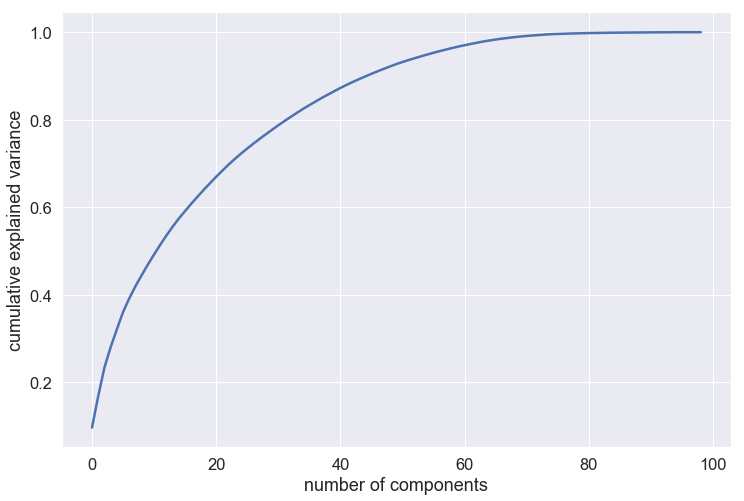

In [123]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [124]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [125]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 20)

In [126]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

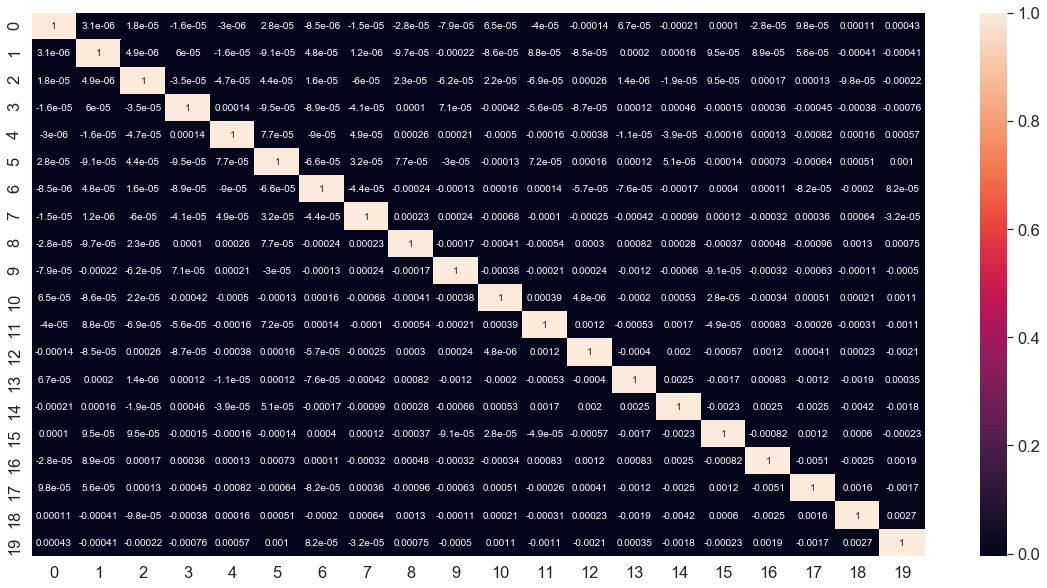

In [127]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [128]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0027348047597243242 , min corr:  -0.00513053279676226


In [129]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 20)

In [130]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [131]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

Accuracy little less than Feature selection with RFE
A similar result, without all the hassles. 

### Random Forest

In [132]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [133]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
# Making predictions
predictions = rfc.predict(X_test)

In [135]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [136]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96      8251
          1       0.72      0.33      0.45       750

avg / total       0.92      0.93      0.92      9001



In [137]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8155   96]
 [ 505  245]]


In [138]:
print(accuracy_score(y_test,predictions))

0.9332296411509832


Tuning max_depth

In [141]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [142]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Ajit Shalini\Anaconda3\li

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.294812,0.044399,0.008377,0.002054,2,{'max_depth': 2},0.919305,0.919524,0.919524,0.919524,...,0.919476,0.000086,4,0.919519,0.919464,0.919464,0.919464,0.919469,0.919476,0.000021
1,0.719150,0.048911,0.011103,0.003205,7,{'max_depth': 7},0.928350,0.924286,0.930714,0.930714,...,0.928381,0.002364,3,0.938925,0.941012,0.941012,0.939940,0.938337,0.939845,0.001082
2,1.263201,0.151622,0.017147,0.004649,12,{'max_depth': 12},0.933111,0.927619,0.933810,0.934762,...,0.932476,0.002504,2,0.974939,0.974940,0.973393,0.975179,0.976549,0.975000,0.001002
3,1.530447,0.081625,0.016755,0.001466,17,{'max_depth': 17},0.932635,0.930476,0.932381,0.937381,...,0.933000,0.002317,1,0.991904,0.990774,0.991250,0.991607,0.990477,0.991202,0.000523


C:\Users\Ajit Shalini\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


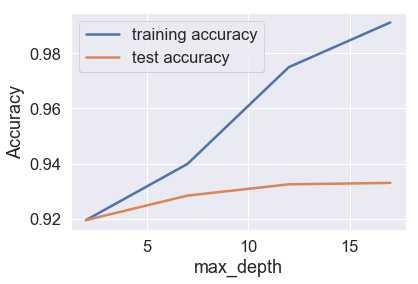

In [143]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [144]:
max_depth = 7

In [ ]:
,,. Tuning n_estimators,,.

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [145]:
n_estimators = 100

In [ ]:
#Tuning max_features

# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [146]:
max_features = 14

Tuning min_samples_leaf

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [147]:
min_samples_leaf = 100

Tuning min_samples_split

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [148]:
min_samples_split = 200

Fitting the final model with the best parameters obtained from grid search.

In [149]:
# model with the best hyperparameters
print(max_depth)
    
print(min_samples_leaf) 
print(min_samples_split)
print(max_features)
print(n_estimators)  

7
100
200
14
100


In [150]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=14,
                             n_estimators=100)

In [151]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [152]:
# predict
predictions = rfc.predict(X_test)

In [153]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      8251
          1       0.69      0.17      0.27       750

avg / total       0.91      0.92      0.90      9001



In [154]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8194   57]
 [ 622  128]]


In [155]:
print(accuracy_score(y_test,predictions))

0.9245639373402955


Random Forest(default)  : 0.9336
Random Forest(parameter Tuning) : 0.9243
logistic regression(AUC) : 0.89

In [156]:
#Feature importance

feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)

In [157]:
#list of important variables
feat_importances.nlargest(30)

avg67_diff8_arpu                0.139563
avg67_diff8_total_rech_amt      0.121185
avg67_diff8_rech_days           0.078464
avg67_diff8_total_og_mou        0.059675
avg67_diff8_max_rech_amt        0.055492
avg67_diff8_rech_data_days      0.048933
avg67_diff8_total_rech_num      0.045267
avg67_diff8_total_ic_mou        0.030647
avg67_diff8_last_day_rch_amt    0.029839
avg67_diff8_loc_ic_t2m_mou      0.029597
avg67_diff8_std_og_mou          0.028377
loc_ic_mou_avg67                0.021191
loc_ic_t2m_mou_avg67            0.020817
avg67_diff8_loc_ic_mou          0.019915
avg67_diff8_loc_ic_t2t_mou      0.019644
total_ic_mou_avg67              0.017476
avg67_diff8_roam_og_mou         0.012876
avg67_diff8_offnet_mou          0.011673
loc_og_mou_avg67                0.010922
aug_vbc_3g                      0.010039
loc_og_t2m_mou_avg67            0.009836
avg67_diff8_std_ic_mou          0.009714
loc_ic_t2t_mou_avg67            0.009606
avg67_diff8_onnet_mou           0.009586
avg67_diff8_roam

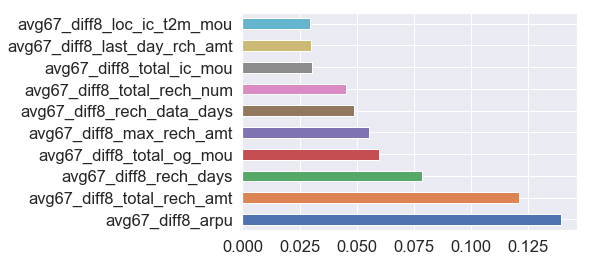

In [162]:
feat_importances.nlargest(10).plot(kind='barh')

Observations:
Difference between 8th and average 6,7 months plays high role in churn prediction
Average revenue per person and recharge amounts are also good indicators for churn

The accuracies of random forest are almost same as logistic regression
Random Forest(default)  : 0.9336
logistic regression(AUC) : 0.89

##Recommondations

High Difference rate of 8th month and avg 67 months are good indicators for churn

Revenue Per Customer are strong indicators of Churn

Churning rate of High Value customers is low which indicates good customer service

Max Recharge Amount could be a good Churn Indicator

Tenure range shows there are customers < 5years

The most number of days from recharge date is alarming for churn rate
